In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types, define_grid, HEIGHT, plot_multibar_chart, NR_STDEV, IQR_FACTOR, determine_outlier_thresholds_for_var,count_outliers, set_chart_labels, plot_multiline_chart
import seaborn as sns
import numpy as np

## Health domain – Pos covid

In [3]:
df = pd.read_csv('../datasets/class_pos_covid.csv', na_values= '')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### Dimensionality

In [4]:
df.shape

(380932, 40)

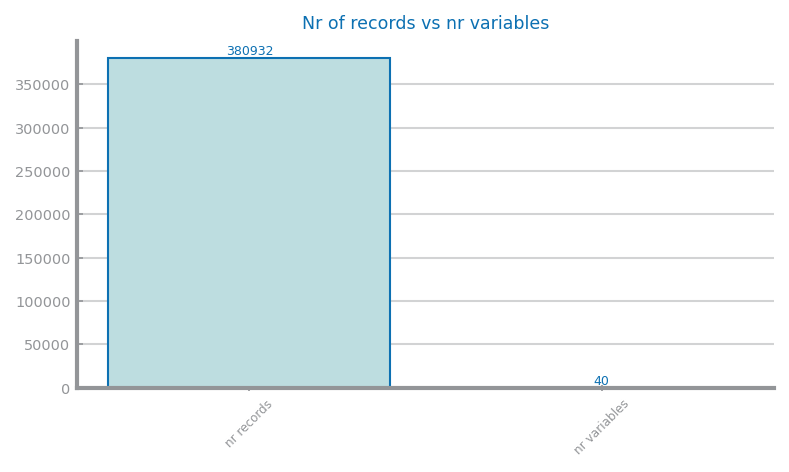

In [5]:
#Figure 1 Nr Records x Nr variables 
plt.figure(figsize=(6, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
plt.show()

{'numeric': ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'], 'binary': ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'], 'date': [], 'symbolic': ['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap']}


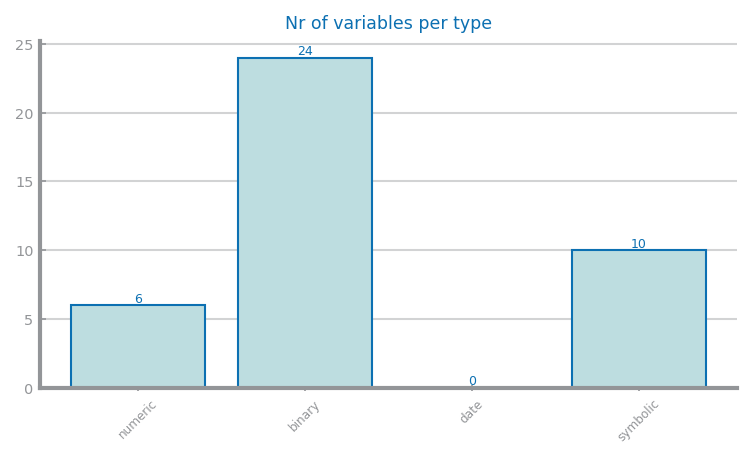

In [6]:
#Figure 2 Nr variables per type 
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

plt.figure(figsize=(6, 3))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
plt.show()

If we need to apply any function that only deals with symbolic variables, we need to transform object variables into category ones (the name for symbolic in pandas).

In [7]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

State                        category
Sex                            object
GeneralHealth                category
PhysicalHealthDays            float64
MentalHealthDays              float64
LastCheckupTime              category
PhysicalActivities             object
SleepHours                    float64
RemovedTeeth                 category
HadHeartAttack                 object
HadAngina                      object
HadStroke                      object
HadAsthma                      object
HadSkinCancer                  object
HadCOPD                        object
HadDepressiveDisorder          object
HadKidneyDisease               object
HadArthritis                   object
HadDiabetes                  category
DeafOrHardOfHearing            object
BlindOrVisionDifficulty        object
DifficultyConcentrating        object
DifficultyWalking              object
DifficultyDressingBathing      object
DifficultyErrands              object
SmokerStatus                 category
ECigaretteUs

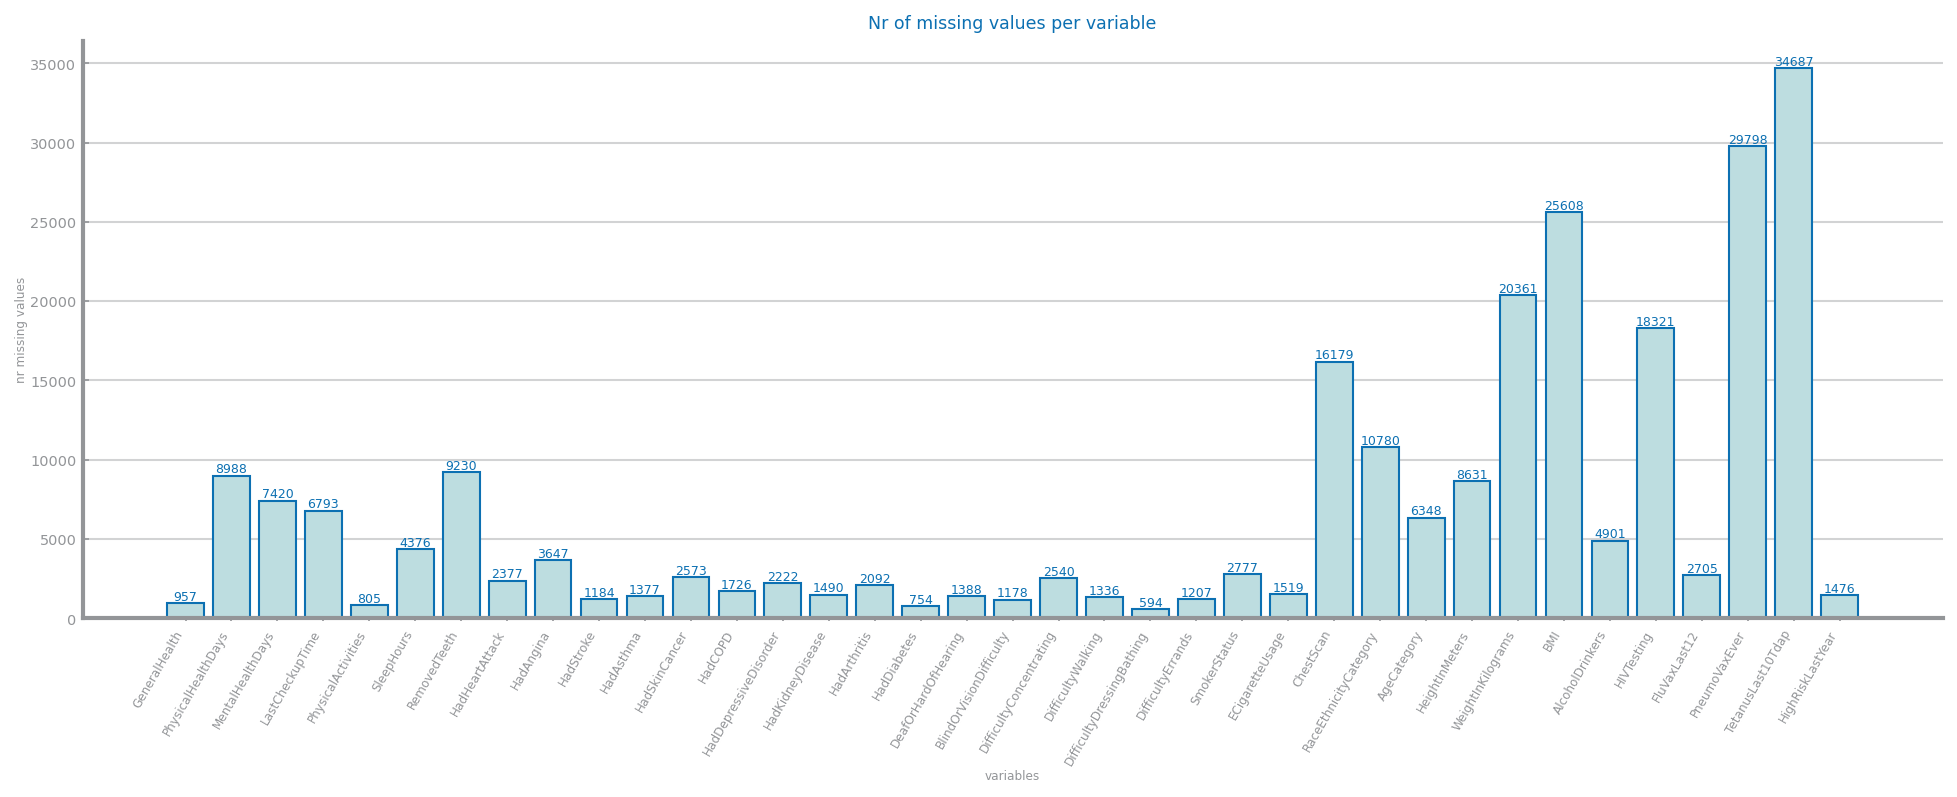

In [8]:
#Figure 3 Nr missing values 
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plt.figure(figsize=(16, 5))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
plt.xticks(rotation=60, ha='right')
plt.show()

### Distribution

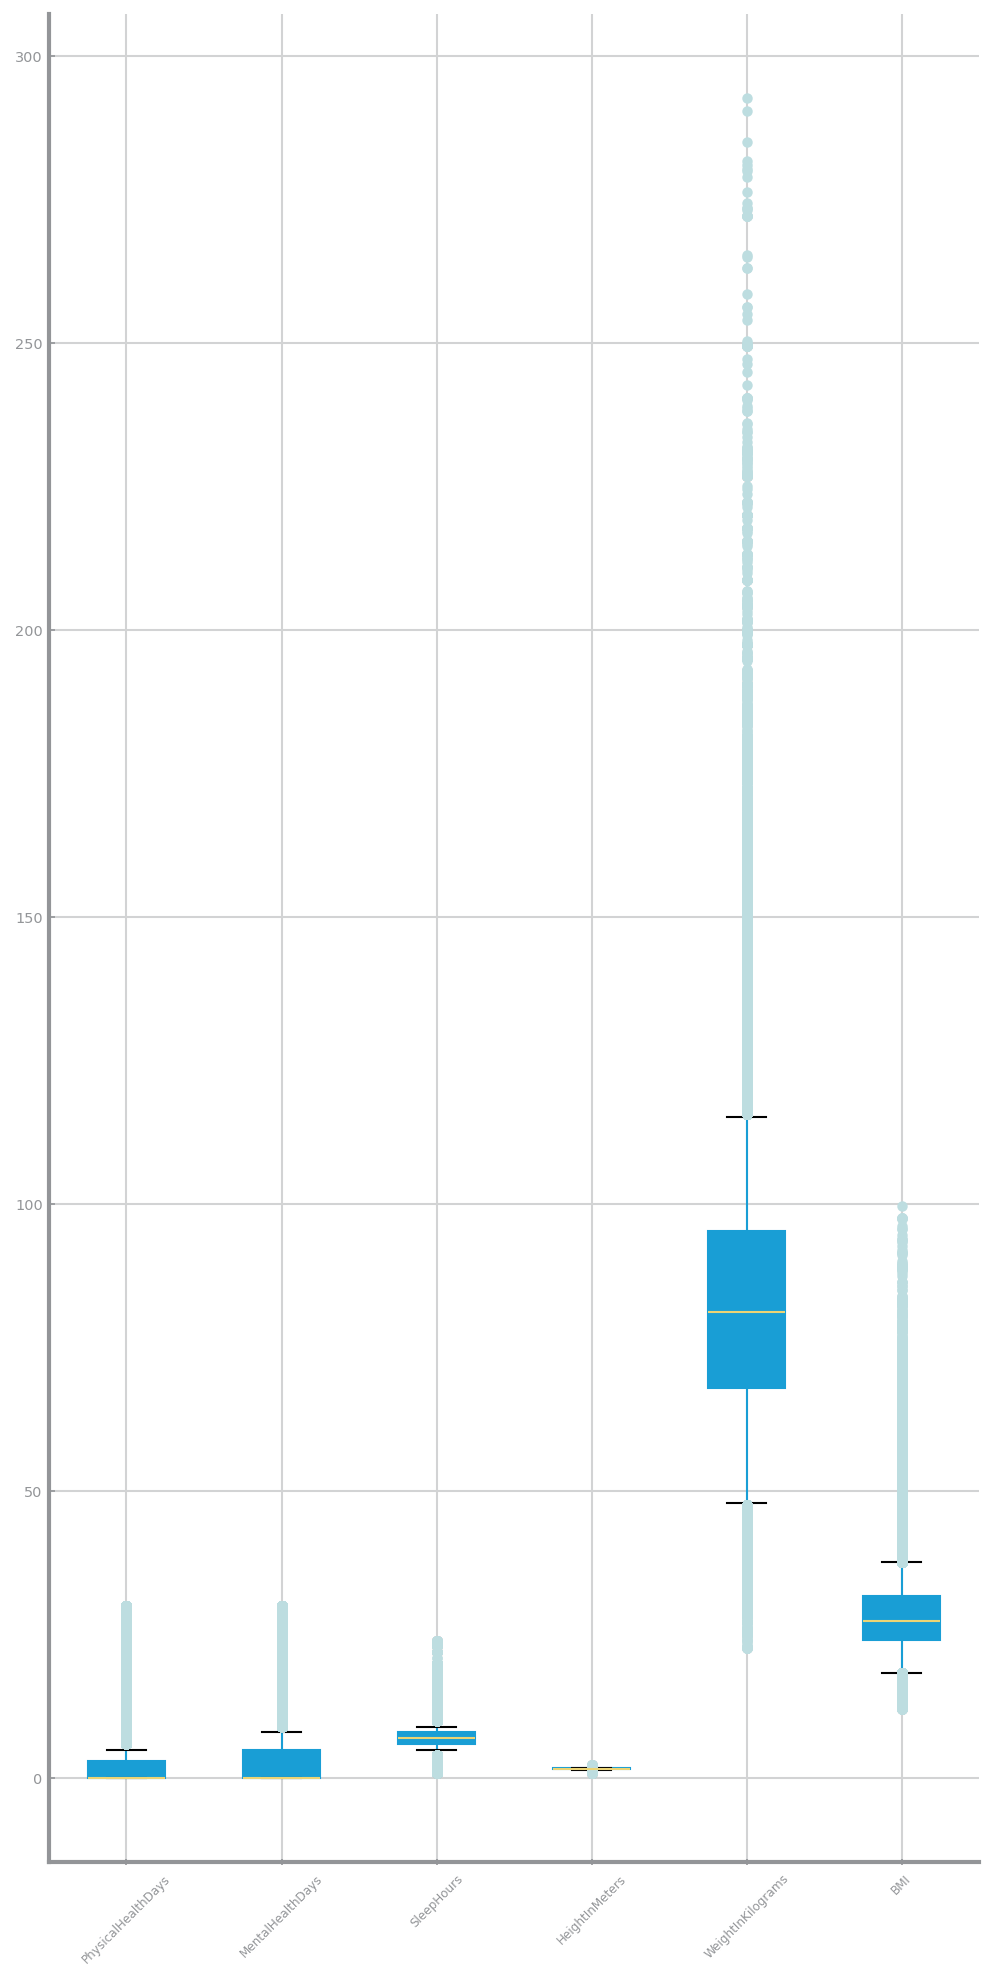

In [9]:
# Figure 4 Global boxplots 
variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    plt.figure(figsize=(8, 16))
    df[numeric].boxplot(rot=45)
else:
    print("There are no numeric variables.")

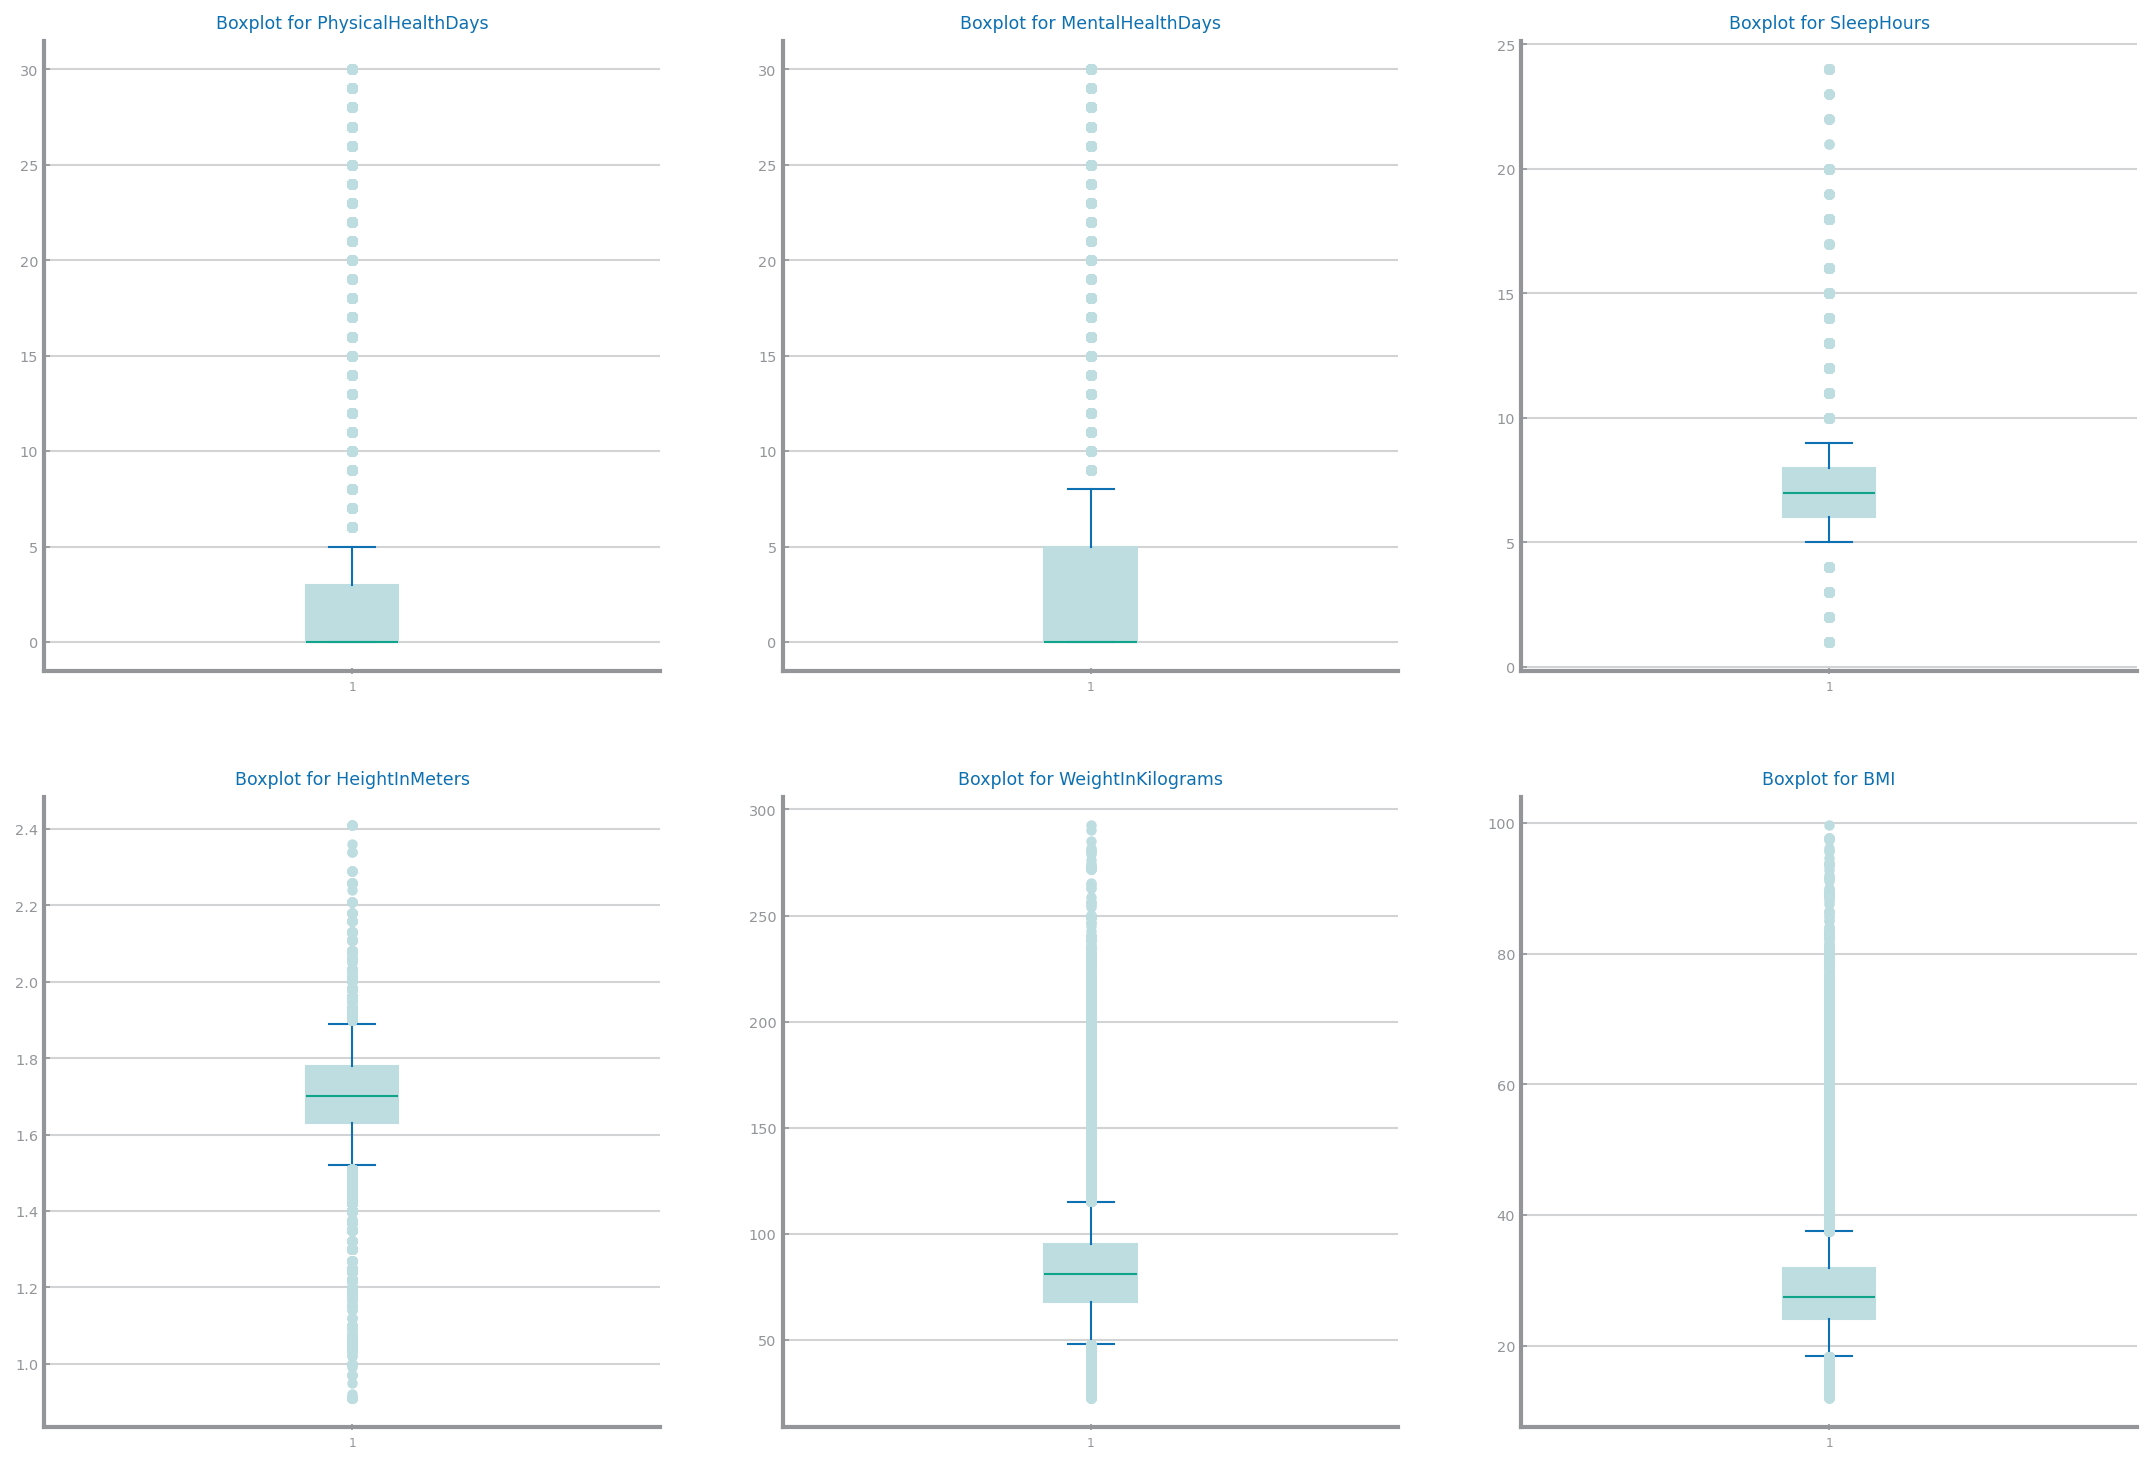

In [10]:
# Figure 5 Single variable boxplots 
if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))

    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * HEIGHT*1.5, rows * HEIGHT*1.5), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
else:
    print("There are no numeric variables.")

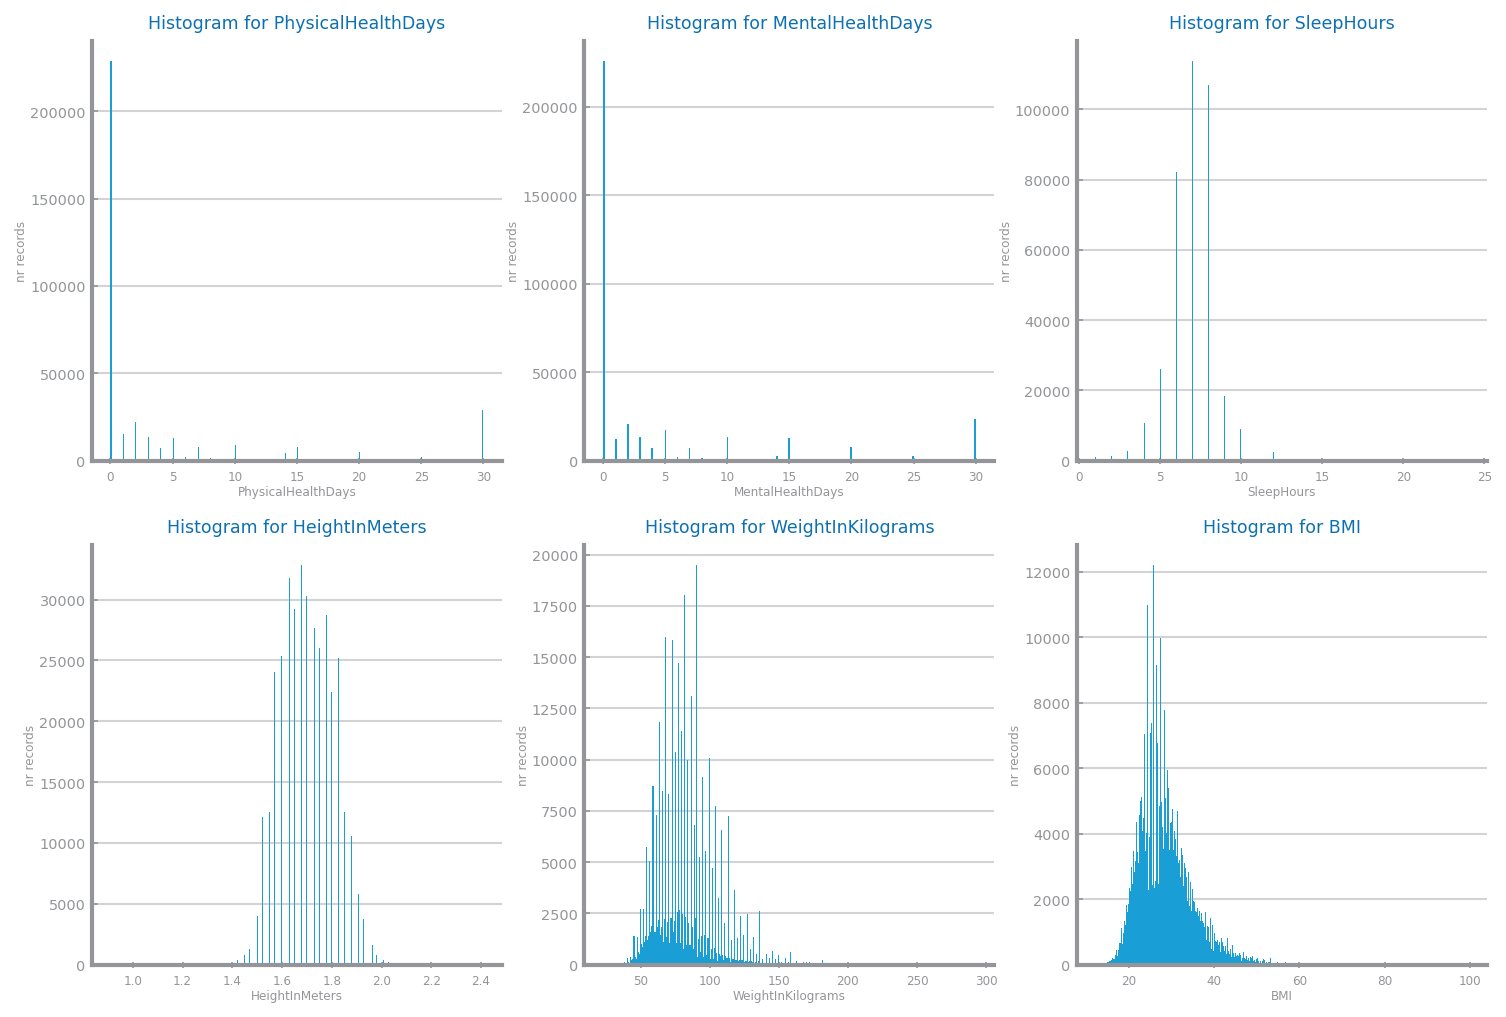

In [12]:
# Figure 7 Histograms
from matplotlib.pyplot import subplots

if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    plt.show()
else:
    print("There are no numeric variables.")


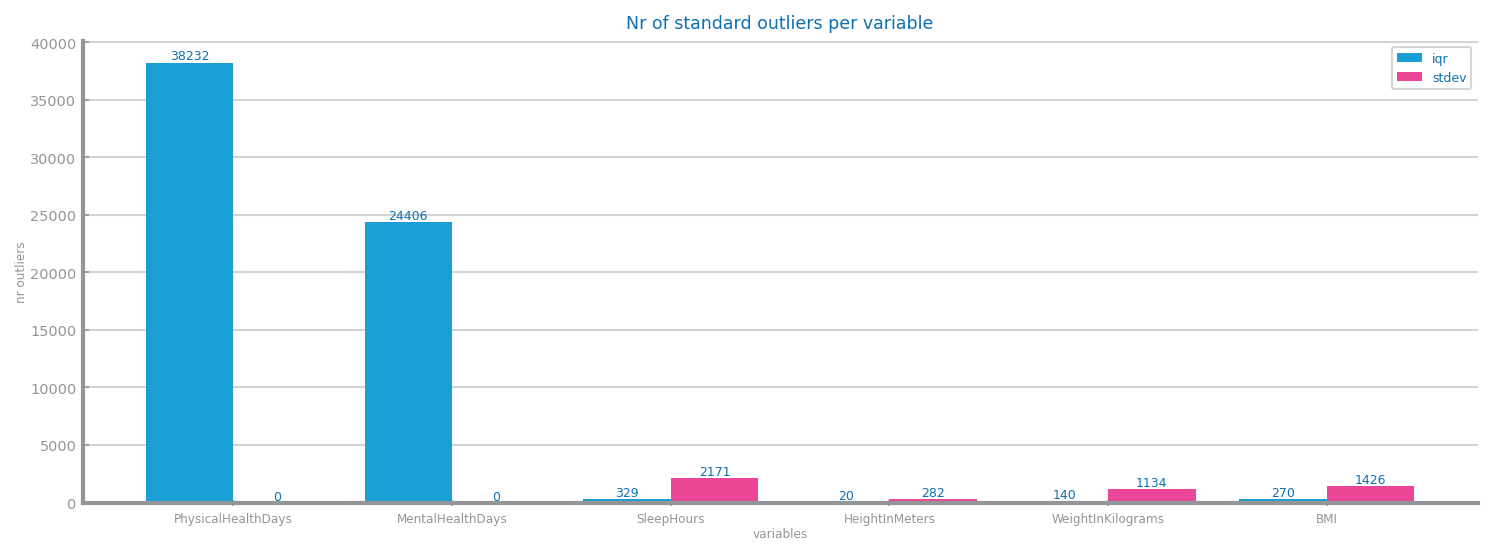

In [33]:
# Figure 9 Outliers study 
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=4, iqrfactor=4.5)
    plt.figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    plt.show()
else:
    print("There are no numeric variables.")

CovidPos
No     270055
Yes    110877
Name: count, dtype: int64


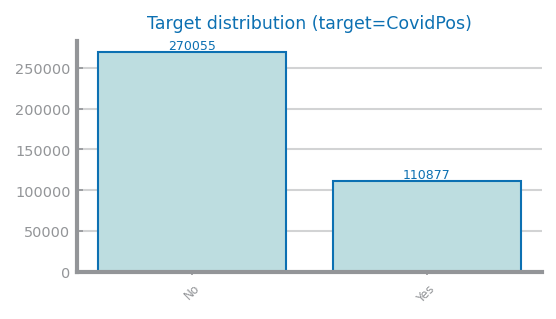

In [13]:
# Figure 11 Class distribution 
from pandas import Series
target = "CovidPos"

values: Series = df[target].value_counts()
print(values)

plt.figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
plt.show()